<a id="toc"></a>
<p><center style="color:#b58a12; font-family: 'Dancing Script', cursive; font-size:55px;"> Welcome! </center></p>

<div style="background-color:#faf3cf; padding: 10px;">
<div class="alert alert-block alert-secondary" style="font-size:18px; font-family:verdana;">  Thank you for exploring my notebook! Dive in, customize, or fork it to fit your project’s unique requirements. Feel free to adjust further if needed! Dive into the data yourself with the source available here: </div>

[https://www.kaggle.com/datasets/mervemenekse/ecommerce-dataset](https://www.kaggle.com/datasets/mervemenekse/ecommerce-dataset)



<center><img  src="https://i.pinimg.com/originals/ea/22/8c/ea228c3c6f44033165f277f2c5f917c3.gif" alt="Image" width="290" height="180" > </center>

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from datetime import datetime
from warnings import filterwarnings
sns.set_context('notebook',font_scale=1.2)
pd.set_option('display.max_columns',None)
from IPython.core.display import HTML,display

# Load dataset

In [2]:
df = pd.read_csv('E-commerce Dataset.csv')

In [3]:
df

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2018-02-28,22:59:50,6.0,78489,Female,Mobile,Member,Home & Furniture,Shoe Rack,124.0,4.0,0.3,19.2,1.9,Medium,money_order
51286,2018-02-28,13:19:25,2.0,91941,Female,Mobile,Member,Home & Furniture,Umbrellas,70.0,5.0,0.2,14.0,1.4,Medium,credit_card
51287,2018-02-28,10:25:07,6.0,63313,Male,Web,Member,Home & Furniture,Dinner Crockery,133.0,1.0,0.3,39.7,4.0,Medium,credit_card
51288,2018-02-28,10:50:08,7.0,86485,Male,Web,Member,Home & Furniture,Sofa Covers,216.0,1.0,0.2,131.7,13.2,Medium,credit_card


```
* Order_Date: The date when the order was placed.
* Time: The time when the order was placed.
* Aging: The duration of delivery time (in days).
* Customer_Id: A unique identifier for each customer.
* Gender: The gender of the customer.
* Device_Type: The type of device used to place the order.
* Customer_Login_type: Indicates whether the customer is a member or a guest.
* Product_Category: The category of the ordered product.
* Product: The specific product ordered.
* Sales: The sales amount (in $ currency) for the order.
* Quantity: The quantity of the product ordered.
* Discount: The discount applied to the order.
* Profit: The profit gained from the order (in $ currency).
* Shipping_Cost: The shipping cost for the order.
* Order_Priority: The priority level of the order (Medium, Critical, High).
* Payment_method: The payment method used.
```

# View data

In [7]:
# check dimension of data
df.shape

(51290, 16)

In [5]:
# check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51290 non-null  object 
 1   Time                 51290 non-null  object 
 2   Aging                51289 non-null  float64
 3   Customer_Id          51290 non-null  int64  
 4   Gender               51290 non-null  object 
 5   Device_Type          51290 non-null  object 
 6   Customer_Login_type  51290 non-null  object 
 7   Product_Category     51290 non-null  object 
 8   Product              51290 non-null  object 
 9   Sales                51289 non-null  float64
 10  Quantity             51288 non-null  float64
 11  Discount             51289 non-null  float64
 12  Profit               51290 non-null  float64
 13  Shipping_Cost        51289 non-null  float64
 14  Order_Priority       51288 non-null  object 
 15  Payment_method       51290 non-null 

✍🏼 **Insights**
- The dataset contains 51290 entries with 16 columns.
- Some columns have missing values.
- Data types vary across columns, including floats and objects.

In [6]:
# check missing values for each column
df.isnull().sum()

Order_Date             0
Time                   0
Aging                  1
Customer_Id            0
Gender                 0
Device_Type            0
Customer_Login_type    0
Product_Category       0
Product                0
Sales                  1
Quantity               2
Discount               1
Profit                 0
Shipping_Cost          1
Order_Priority         2
Payment_method         0
dtype: int64

*  Since there is some row with missing values, we will drop it rather doing data imputation

In [8]:
# drop row with missing values
df = df.dropna().reset_index(drop=True)

In [9]:
# check missing values for each column
df.isnull().sum()

Order_Date             0
Time                   0
Aging                  0
Customer_Id            0
Gender                 0
Device_Type            0
Customer_Login_type    0
Product_Category       0
Product                0
Sales                  0
Quantity               0
Discount               0
Profit                 0
Shipping_Cost          0
Order_Priority         0
Payment_method         0
dtype: int64

* No missing values found

In [10]:
#checking for duplicates in data
df.duplicated().sum()

0

*  No Duplicate data has found


In [11]:
# check descriptive statistics
display(round(df.describe(),2).T)

,count,mean,std,min,25%,50%,75%,max
Aging,51282.0,5.26,2.96,1.0,3.0,5.0,8.00,10.5
Customer_Id,51282.0,58159.75,26031.76,10000.0,35841.5,61021.5,80739.25,99999.0
Sales,51282.0,152.34,66.49,33.0,85.0,133.0,218.00,250.0
Quantity,51282.0,2.50,1.51,1.0,1.0,2.0,4.00,5.0
Discount,51282.0,0.30,0.13,0.1,0.2,0.3,0.40,0.5
Profit,51282.0,70.40,48.73,0.5,24.9,59.9,118.40,167.5
Shipping_Cost,51282.0,7.04,4.87,0.1,2.5,6.0,11.80,16.8


In [12]:
# check descriptive statistics
df.select_dtypes(include = ['object']).describe().T

,count,unique,top,freq
Order_Date,51282,356,2018-04-24,615
Time,51282,35273,19:54:45,7
Gender,51282,2,Male,28132
Device_Type,51282,2,Web,47624
Customer_Login_type,51282,4,Member,49089
Product_Category,51282,4,Fashion,25646
Product,51282,42,Suits,2332
Order_Priority,51282,4,Medium,29432
Payment_method,51282,5,credit_card,38131


✍🏼 **Insights**
* The dataset comprises 51,282 records, with males constituting the majority at 28,132 transactions.
* The Majority of transactions approximately 47,624 are conducted via web platforms, indicating a preference for online shopping on desktops or laptops over mobile devices.
* Most transactions approximately 49,089 are made by members, showing customer loyalty.
* Fashion is the leading product category with 25,646 transactions, dominate 50% marketing of product category.
* Credit card payments are the preferred method as it's used in 38,131 transactions, highlighting its convenience.
* Customers purchase an average of 2.5 items per transaction.
* The average delivery time is approximately 5.06 days.

In [13]:
# convert the Order_Date values to datetime objects
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# EDA (Exploratory Data Analysis)

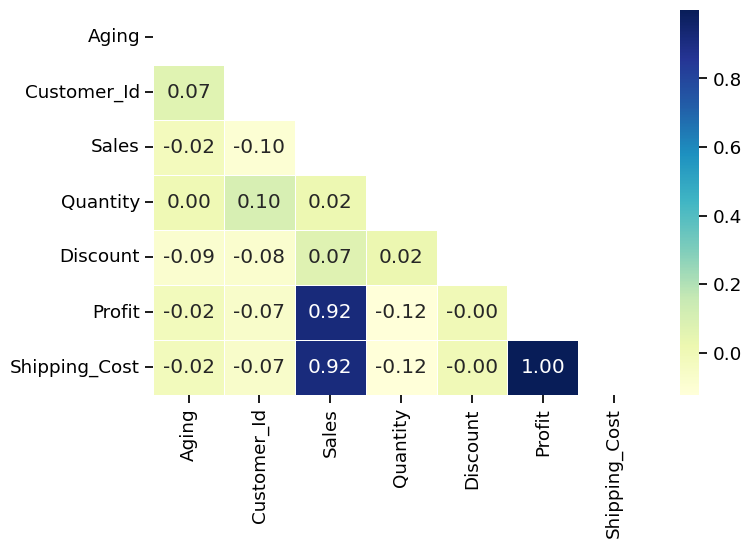

In [ ]:
# Calculate correlation on numerical columns
corr = df.select_dtypes(include=['number']).corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(corr, annot=True, fmt='.2f', mask=mask, cmap='YlGnBu', linewidths=0.5, ax=ax)
plt.show()

✍🏼 **Insights**
* Profit and Shipping cost (1.00) implies that higher profit lead to higher shipping cost.
* Sales and Profit (0.92) indicating that higher sales generally lead to higher profits.
* Sales and Shipping Cost (0.92) suggesting that higher sales are associated with higher shipping costs.
* Discount and Quantity (0.11) is a moderate positive correlation between discounts and quantity, indicating that higher discounts might lead  the increase number of items purchased.

In [14]:
# Get the top 4 product categories by count
product_category_counts = df['Product_Category'].value_counts()[:4]

custom_colors = ['#2F455C', '#2C6566', '#25BDB0', '#56D7B4']
fig = go.Figure(go.Funnel(
    y=product_category_counts.index,
    x=product_category_counts.values,
    textinfo='value',
    textfont=dict(size=17),
    marker=dict(color=custom_colors)))

fig.update_layout(
    title_text='Best Product Category',
    template='plotly_white',
    width=1000,
    height=500,
    title_font=dict(size=24),
    yaxis=dict(
        tickfont=dict(size=20)),
    xaxis=dict(
        tickfont=dict(size=20)))

fig.show()

In [ ]:
# Select categorical columns
cat_columns = df[['Customer_Login_type', 'Payment_method', 'Gender', 'Device_Type', 'Product_Category', 'Aging']]

def univariateAnalysis_category(cols):
    print("Distribution of", cols)
    print("_"* 60)
    colors = ['#2F455C', '#25BDB0', '#56D7B4', '#1DCDFE', '#EDBF43']
    value_counts = cat_columns[cols].value_counts()

    fig = px.bar(value_counts, x=value_counts.index, y=value_counts.values, title=f'Distribution of {cols}',
                 labels={'x': 'Categories', 'y': 'Count'}, color_discrete_sequence=[colors])
    fig.update_layout(
        width=800,
        plot_bgcolor='#ffffff',
        paper_bgcolor='#ffffff',
        font=dict(size=18),
        title=dict(font=dict(size=24)),
        legend=dict(font=dict(size=13)))
    fig.show()

    percentage = (value_counts / value_counts.sum()) * 100
    fig = px.pie(values=percentage, names=value_counts.index,
                 labels={'names': 'Categories', 'values': 'Percentage'}, hole=0.5, color_discrete_sequence=colors)
    fig.add_annotation(x=0.5, y=0.5, align="center", xref="paper",
                       yref="paper", showarrow=False, font_size=20, text=f'{cols}')
    fig.update_layout(
        legend=dict(x=0.9, y=0.5, font=dict(size=17)),
        width=800,
        font=dict(size=20),
        title=dict(font=dict(size=24)))
    fig.show()
    print("       ")

for x in cat_columns:
    univariateAnalysis_category(x)

Distribution of Customer_Login_type
____________________________________________________________


       
Distribution of Payment_method
____________________________________________________________


       
Distribution of Gender
____________________________________________________________


       
Distribution of Device_Type
____________________________________________________________


       
Distribution of Product_Category
____________________________________________________________


       
Distribution of Aging
____________________________________________________________


✍🏼 **Insights**

* Customer Login Type dominated by member, implies strong customer
loyalty and retention. Implement loyalty programs that offer exclusive deals and early access to sales could repeat the customers, and encourage existing customers to refer new ones by offering referral bonuses or discounts.
* Most customers prefer using credit cards for their transactions, given their convenience.
* The majority of users are accessing services via web browsers. Ensure your website loads quickly and consider developing mobile apps for iOS and Android to offer a more efficient user experience.
* The delivery time is fairly evenly distributed across different time ranges. However, efforts could be made to further reduce the longest delivery times and ensure more consistent delivery experiences.

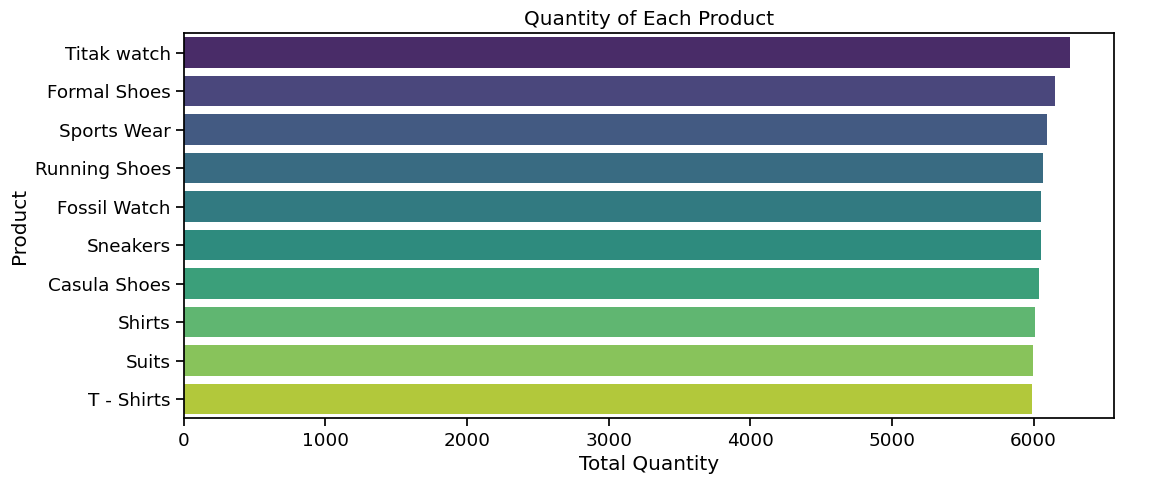

In [ ]:
# Identify the top 10 products by total quantity
top_products = df.groupby('Product')['Quantity'].sum().nlargest(10).index
filtered_data = df[df['Product'].isin(top_products)]
total_quantities = filtered_data.groupby('Product')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x='Quantity', y='Product', data=total_quantities, palette='viridis', hue='Product', dodge=False, legend=False)
plt.title('Quantity of Each Product')
plt.xlabel('Total Quantity')
plt.ylabel('Product')

for index, row in total_quantities.iterrows():
    plt.text(row['Quantity'], index, f'{row["Quantity"]:.2f}', color='black', ha="left", alpha=0)

plt.show()

✍🏼 **Insights**

All products are fashion-related, there is a variety within this category. Titak Watch is the best-selling product, with the highest quantity sold compared to other products. Meanwhile Formal Shoes and Sports Wear also show high demand, in terms of quantity sold.

In [ ]:
# Extract year, month, week, and quarter from 'Order_Date'
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month
df['Week'] = df['Order_Date'].dt.isocalendar().week
df['Quarter'] = df['Order_Date'].dt.quarter

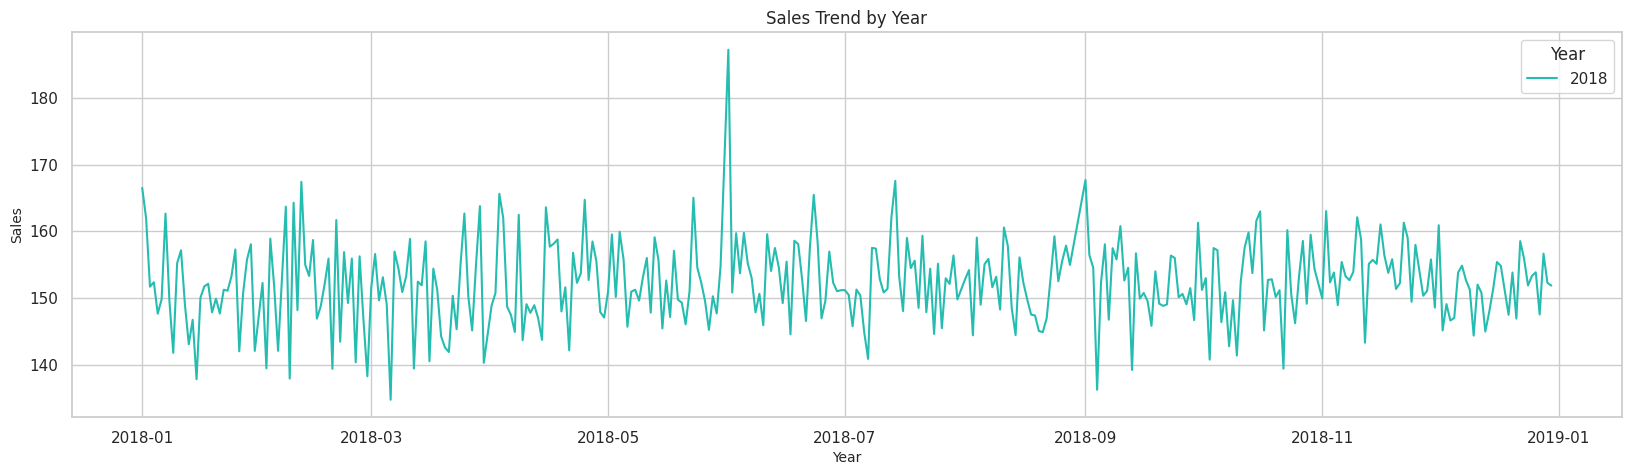

In [ ]:
# Sales trend by Year
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
custom_palette = ['#25BDB0'] + sns.color_palette("husl", len(df['Year'].unique()) - 1)
sns.lineplot(data=df, x="Order_Date", y="Sales", errorbar=None, hue="Year", palette=custom_palette)
plt.title("Sales Trend by Year")
plt.xlabel("Year", fontsize=10)
plt.ylabel("Sales", fontsize=10)
plt.legend(title="Year", loc='best')
plt.show()

✍🏼 **Insights**

The overall trend seems relatively consistent, with sales generally hovering around the same range. The sales trend shows fluctuations throughout the year, with some peaks around May and July 2018. Sales promotions or campaigns could be strategically placed around the months with historical spikes (May, July, November) to maximize returns.

Description of Shipping_Cost
----------------------------------------------------------------------------
count    51282.000000
mean         7.041166
std          4.871685
min          0.100000
25%          2.500000
50%          6.000000
75%         11.800000
max         16.800000
Name: Shipping_Cost, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


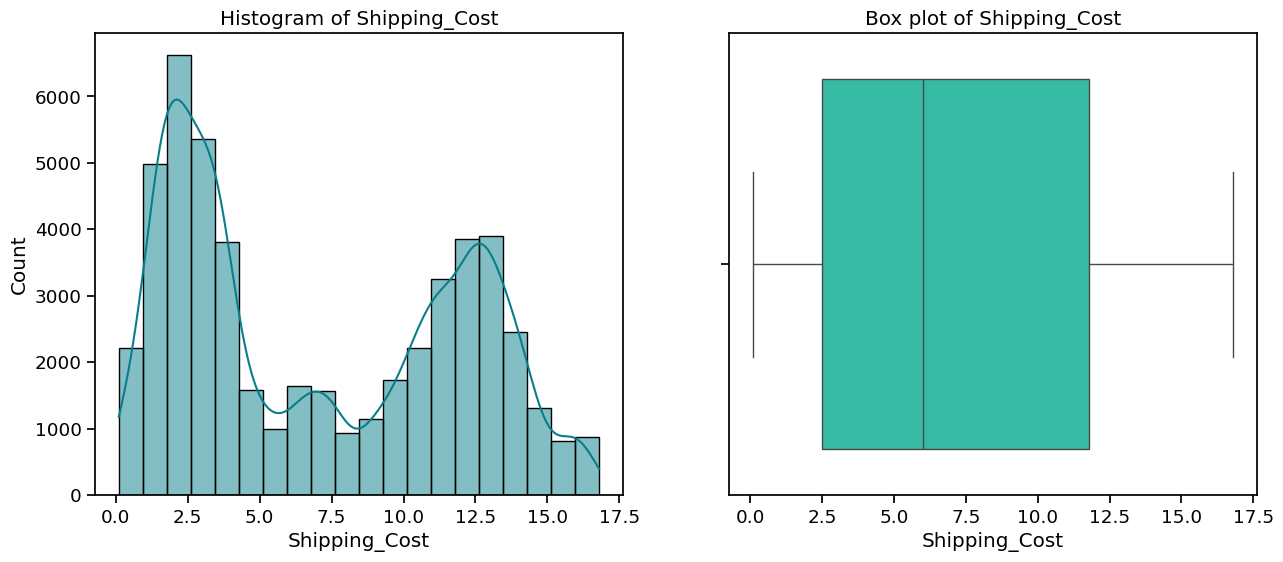

Description of Sales
----------------------------------------------------------------------------
count    51282.000000
mean       152.337350
std         66.492468
min         33.000000
25%         85.000000
50%        133.000000
75%        218.000000
max        250.000000
Name: Sales, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


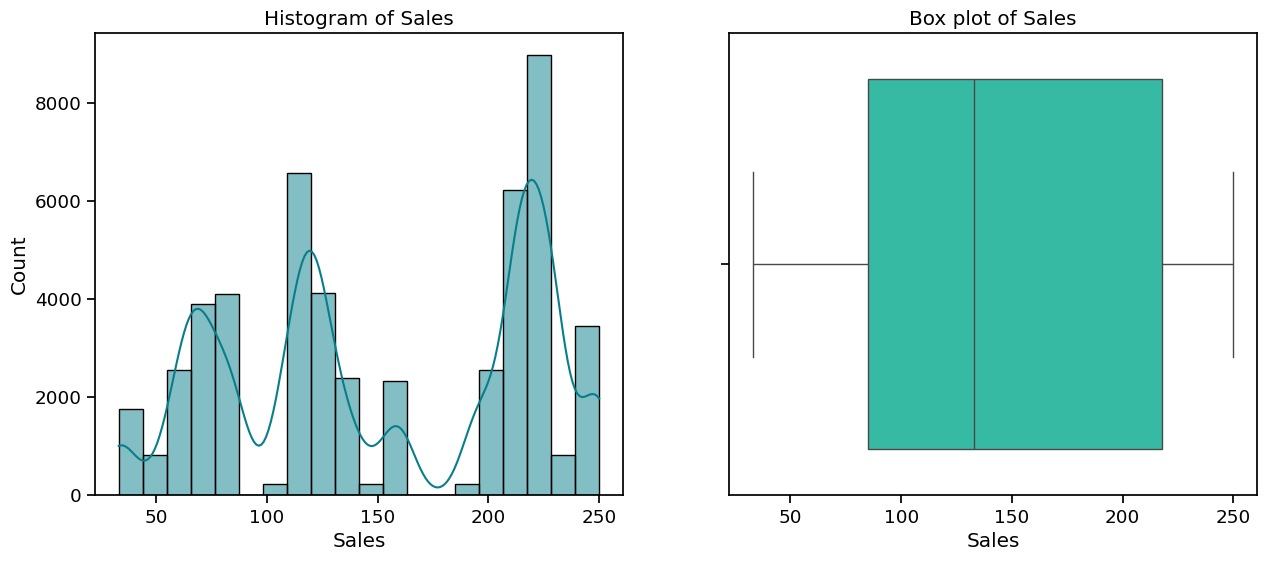

Description of Profit
----------------------------------------------------------------------------
count    51282.000000
mean        70.401796
std         48.728131
min          0.500000
25%         24.900000
50%         59.900000
75%        118.400000
max        167.500000
Name: Profit, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


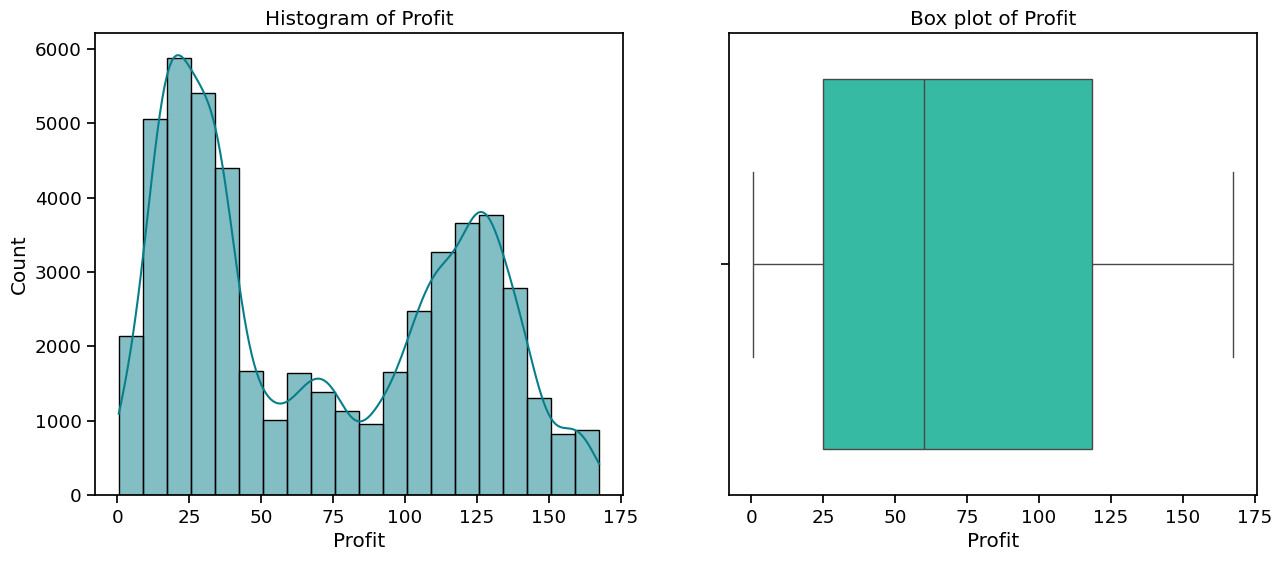

In [ ]:
# Calculate Data Distribution
def univariateAnalysis_numeric(column, nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(), end=' ')

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    print("----------------------------------------------------------------------------")
    sns.histplot(df[column], bins=nbins, kde=True, ax=axes[0], line_kws={'color': '#2F455C'}, color='#087E8B')
    axes[0].set_title("Histogram of " + column)

    print("----------------------------------------------------------------------------")
    sns.boxplot(x=df[column], ax=axes[1], color='#21D0B2')
    axes[1].set_title("Box plot of " + column)
    plt.show()

numeric_columns = ['Shipping_Cost', 'Sales', 'Profit']
for col in numeric_columns:
    univariateAnalysis_numeric(col, 20)

✍🏼 **Insights**

Profit histogram shows distribution with two peaks around 25 and 125.
There is a significant drop in frequency between 50 and 100. This might suggests there are two distinct groups of products or transactions contributing to profits, with few products or transactions generating profits in the mid-range (50 to 100).

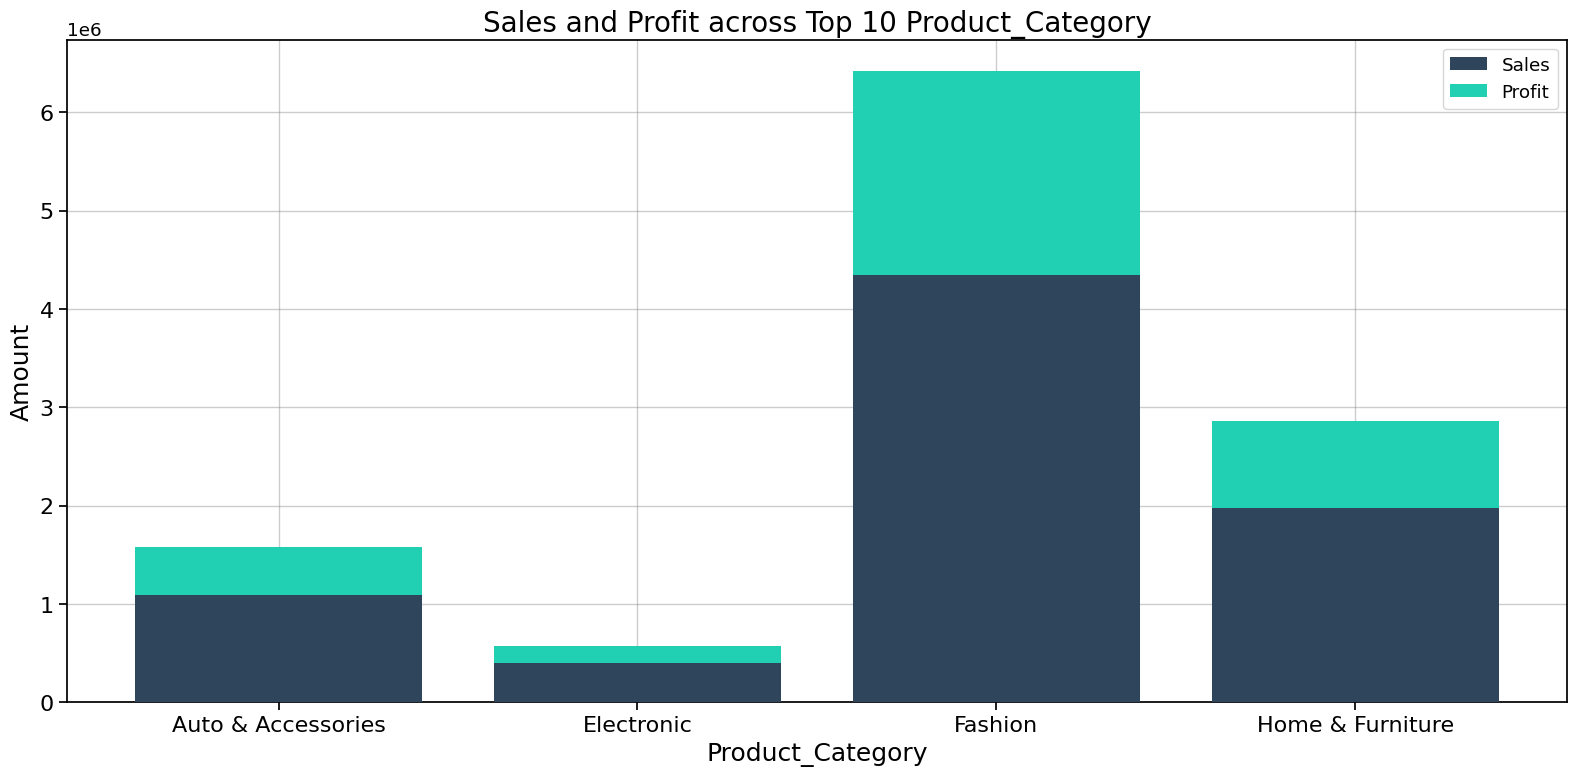

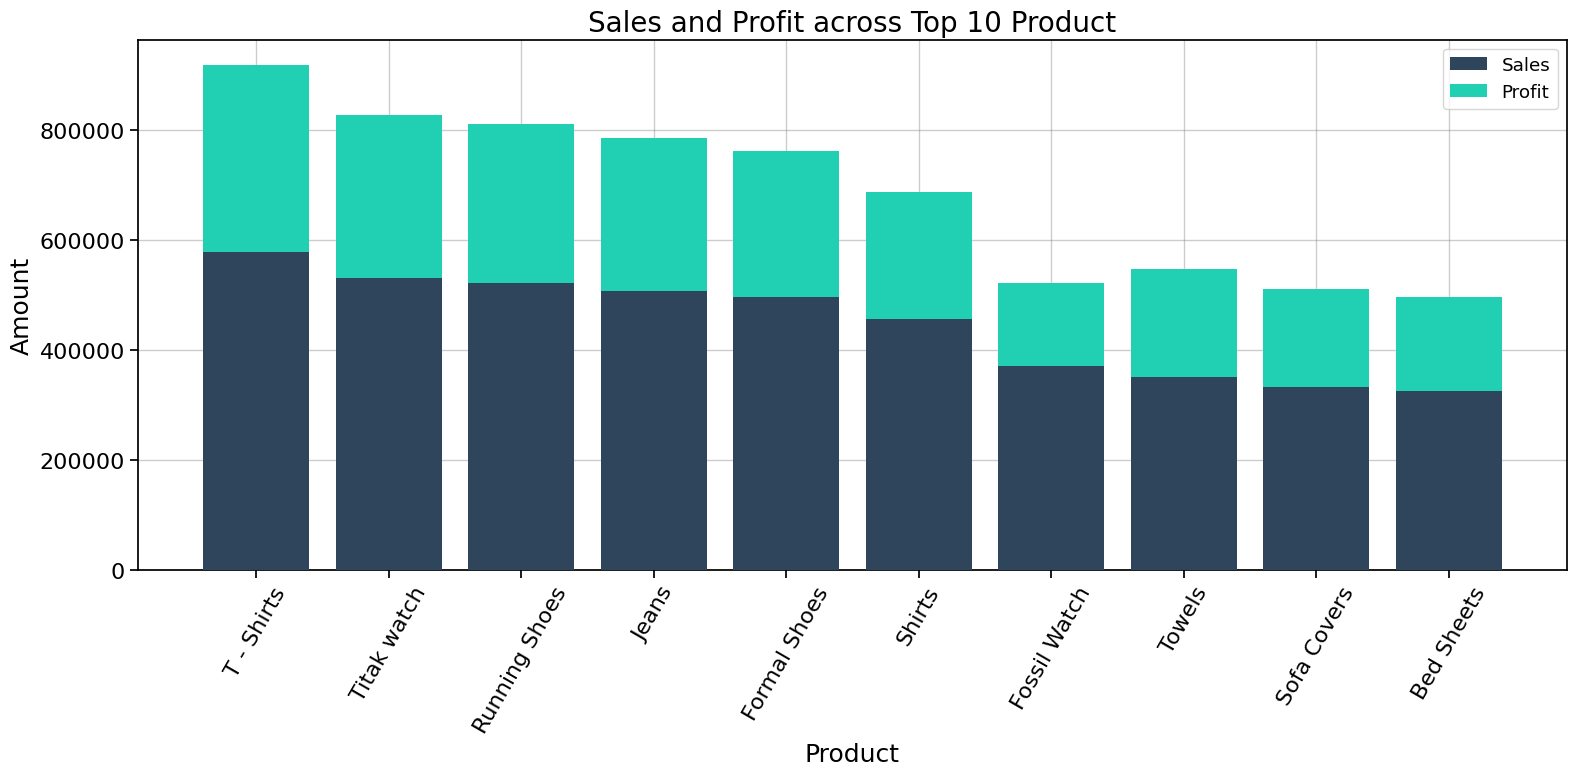

In [ ]:
# Calculate Sales and Profit
df['Month'] = df['Order_Date'].dt.month
features_to_compare = ['Product_Category', 'Product']

for col in features_to_compare:
    temp = df.groupby(col)[['Sales', 'Profit']].sum().reset_index()
    if len(df[col].unique()) > 10:
        temp = temp.sort_values('Sales', ascending=False)[:10]
        plt.figure(figsize=(16, 8))
        plt.xticks(rotation=60)
    else:
        plt.figure(figsize=(16, 8))

    plt.bar(temp[col], temp['Sales'], color='#2F455C', zorder=3)
    plt.bar(temp[col], temp['Profit'], bottom=temp['Sales'], color='#21D0B2', zorder=3)
    plt.legend(['Sales', 'Profit'], bbox_to_anchor=(1.0, 1.0))

    plt.xlabel(col, fontsize=18)
    plt.ylabel('Amount', fontsize=18)
    plt.title(f'Sales and Profit across Top 10 {col}', fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(True, color='gray', alpha=0.4, zorder=0)
    plt.tight_layout()
    plt.show()

✍🏼 **Insights**

Fashion dominates both sales and profit in product category, contributing the most overall. Electronic has the lowest sales and profit among the categories shown, lags behind significantly in both sales and profit. T-Shirts, Titak Watches, and Running Shoes make the highest total sales. Enhancing the product line or promotions for best-selling products could further boost sales and profit.

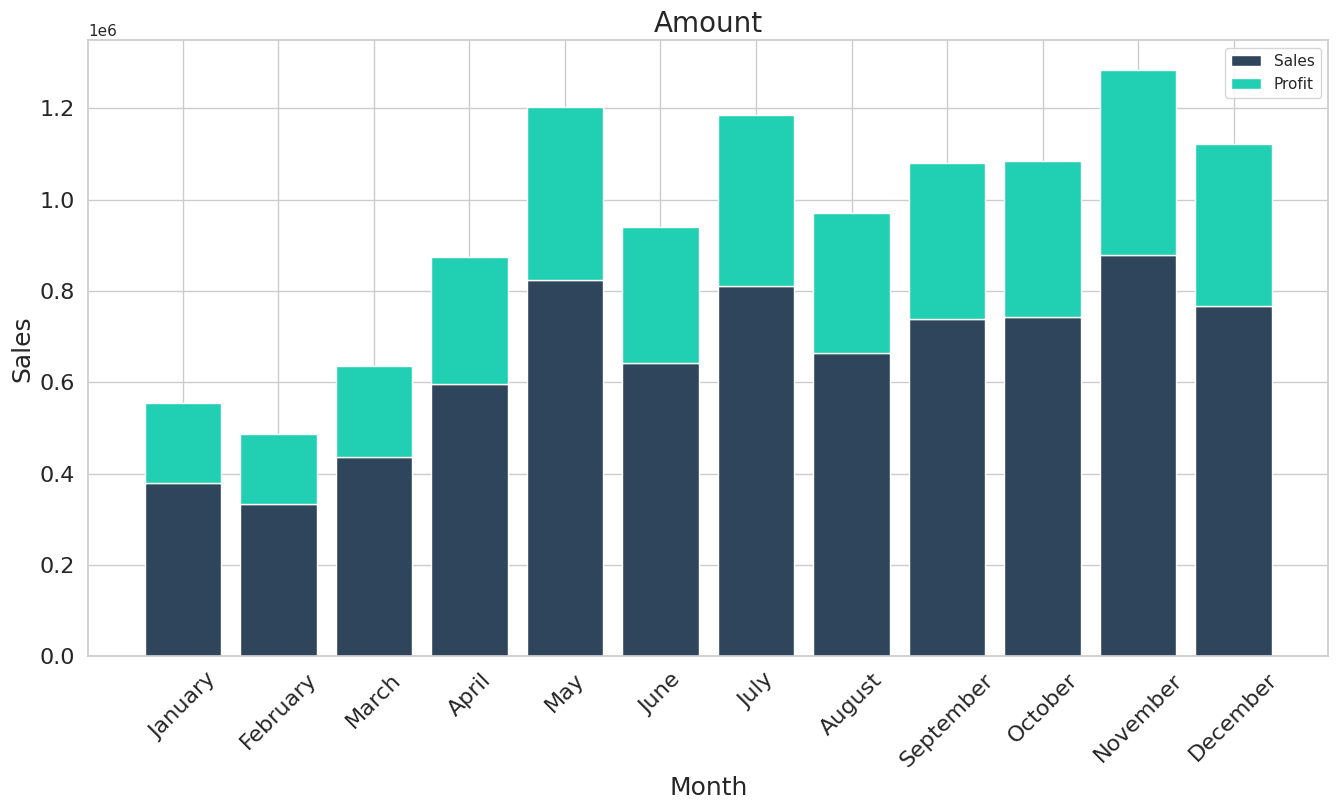

In [ ]:
# calculate Sales and Profit
df['Month'] = df['Order_Date'].dt.month

temp = df.groupby('Month')[['Sales', 'Profit']].sum().reset_index()
temp = temp.sort_values('Month')

plt.figure(figsize=(16, 8))
plt.bar(temp['Month'], temp['Sales'], color='#2F455C', label='Sales')
plt.bar(temp['Month'], temp['Profit'], bottom=temp['Sales'], color='#21D0B2', label='Profit')
plt.legend(bbox_to_anchor=(1.0, 1.0))

plt.xlabel('Month', fontsize=18)
plt.ylabel('Sales', fontsize=18)
plt.title('Amount', fontsize=20)
plt.xticks(fontsize=16, rotation=45, ticks=range(1, 13), labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.yticks(fontsize=16)
plt.show()

✍🏼 **Insights**

Sales and profit increase steadily from January to December, peaking in November. May to July show significant growth in both sales and profit compared to the earlier months. The highest values observed in November to December, likely due to seasonal shopping trends. Begin marketing campaigns in October to build anticipation and capture early shoppers, and plan special sales events around key dates such as Black Friday, Cyber Monday, and Christmas.


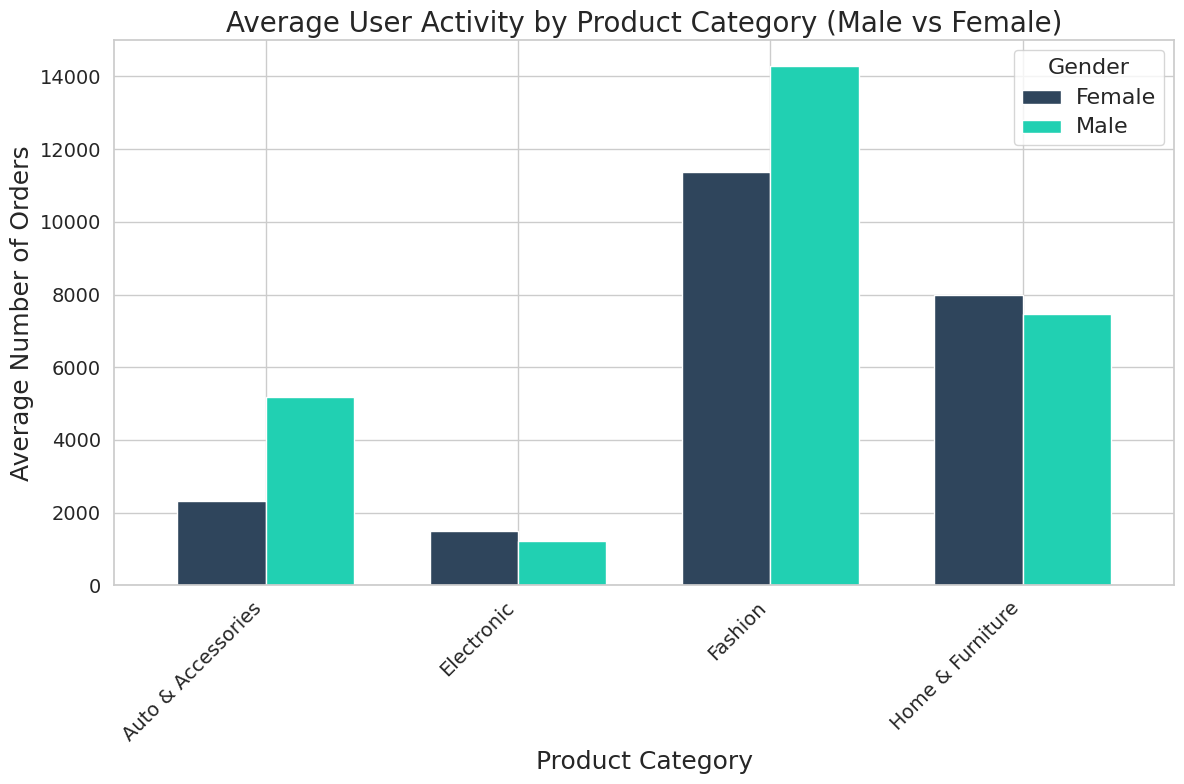

In [ ]:
category_orders = df.groupby(['Product_Category', 'Gender'])['Customer_Id'].count().reset_index()
average_orders_per_category_gender = category_orders.groupby(['Product_Category', 'Gender'])['Customer_Id'].mean().unstack()

fig, ax = plt.subplots(figsize=(12, 8))
average_orders_per_category_gender.plot(kind='bar', ax=ax, color=['#2F455C', '#21D0B2'], width=0.7)

plt.xlabel('Product Category', fontsize=18)
plt.ylabel('Average Number of Orders', fontsize=18)
plt.title('Average User Activity by Product Category (Male vs Female)', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

legend = plt.legend(title='Gender', fontsize=14, title_fontsize=16)
for text in legend.get_texts():
    text.set_fontsize(16)
legend.get_title().set_fontsize(16)
plt.tight_layout()
plt.show()

✍🏼 **Insights**

Fashion products have the highest user activity for both male and female users, with males showing higher engagement. Use social media influencers and fashion bloggers to promote fashion products. Implement personalized recommendations and offers customers based on their browsing and purchase history in the fashion category.

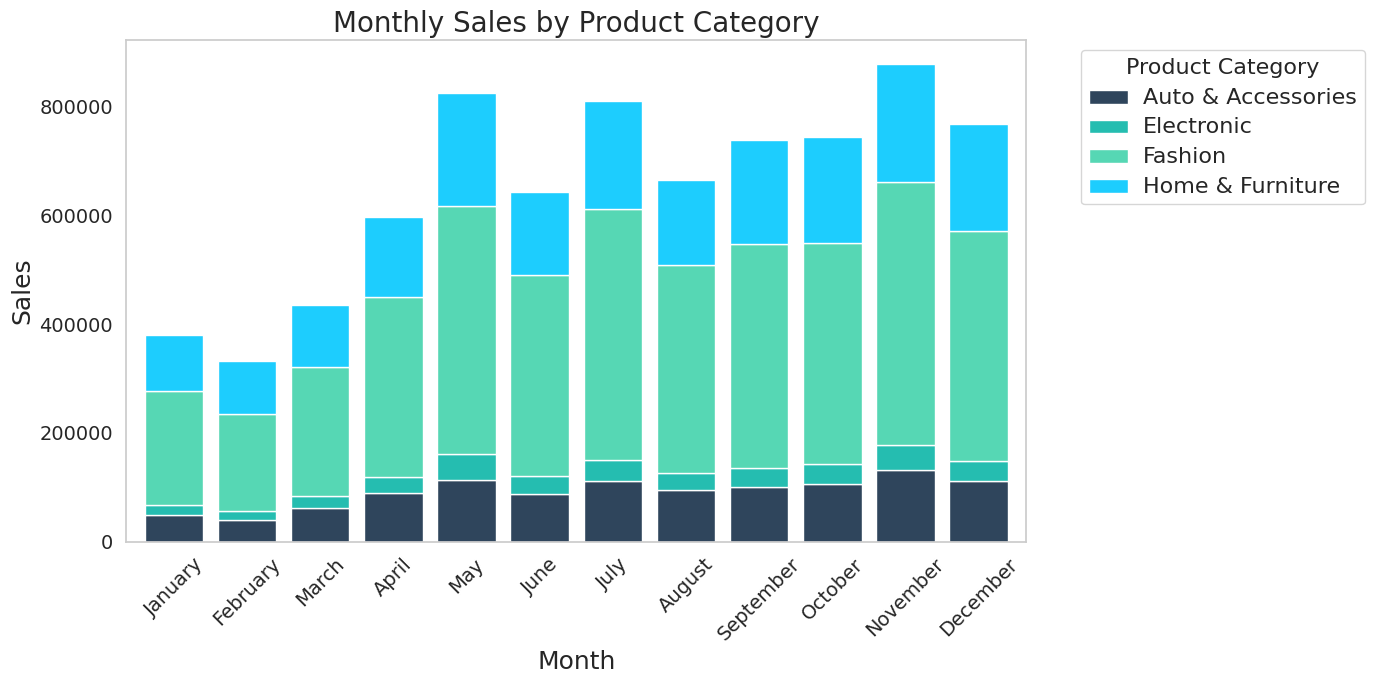

In [ ]:
df['YearMonth'] = df['Order_Date'].dt.to_period('M')

sales_trend = df.groupby(['YearMonth', 'Product_Category'])['Sales'].sum().unstack(fill_value=0)
sales_trend.index = sales_trend.index.to_timestamp()
sales_trend.index = sales_trend.index.strftime('%B')

fig, ax = plt.subplots(figsize=(14, 7))
sales_trend.plot(kind='bar', stacked=True, ax=ax, color=['#2F455C', '#25BDB0', '#56D7B4', '#1DCDFE', '#EDBF43'], width=0.8)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Sales', fontsize=18)
plt.title('Monthly Sales by Product Category', fontsize=20)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

legend = plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14, title_fontsize=16)
for text in legend.get_texts():
    text.set_fontsize(16)
legend.get_title().set_fontsize(16)

ax.grid(False)
plt.tight_layout()
plt.show()

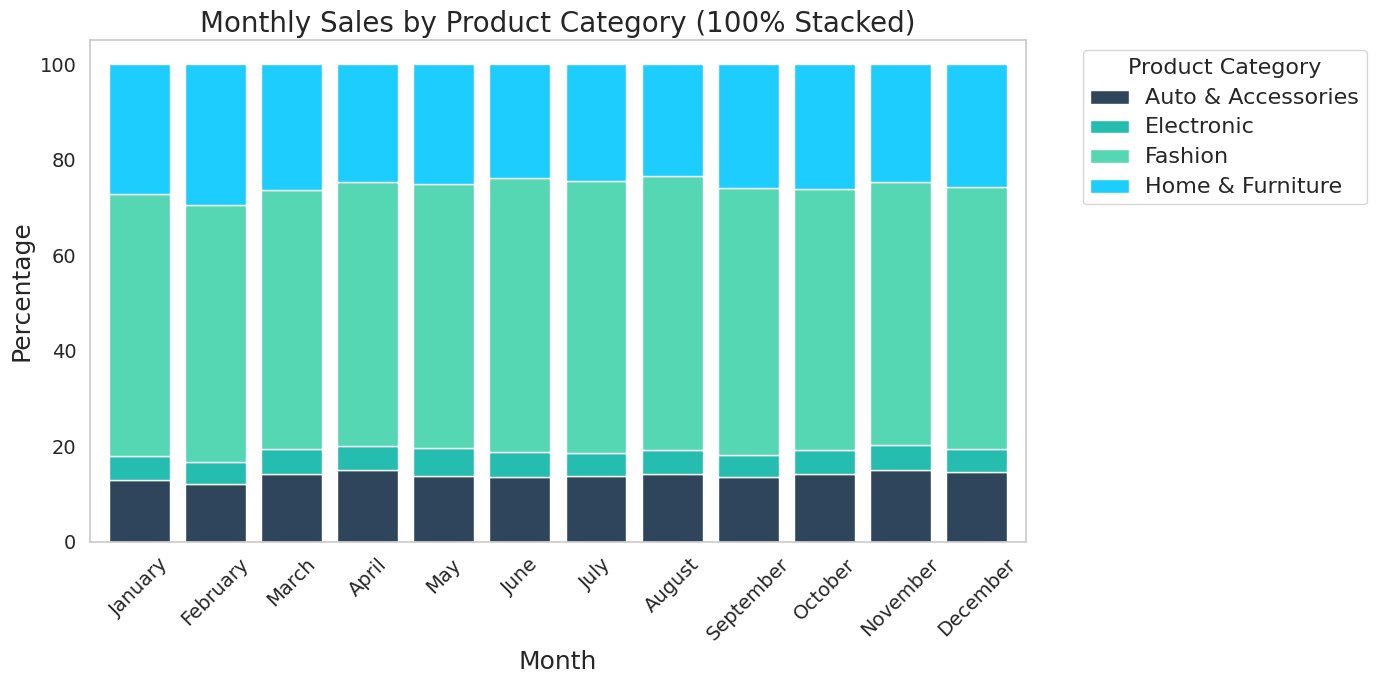

In [ ]:
df['YearMonth'] = df['Order_Date'].dt.to_period('M')

sales_trend = df.groupby(['YearMonth', 'Product_Category'])['Sales'].sum().unstack(fill_value=0)
sales_trend.index = sales_trend.index.to_timestamp()
sales_trend.index = sales_trend.index.strftime('%B')

sales_trend_percent = sales_trend.div(sales_trend.sum(axis=1), axis=0) * 100
fig, ax = plt.subplots(figsize=(14, 7))
sales_trend_percent.plot(kind='bar', stacked=True, ax=ax, color=['#2F455C', '#25BDB0', '#56D7B4', '#1DCDFE', '#EDBF43'], width=0.8)

plt.xlabel('Month', fontsize=18)
plt.ylabel('Percentage', fontsize=18)
plt.title('Monthly Sales by Product Category (100% Stacked)', fontsize=20)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

legend = plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14, title_fontsize=16)
for text in legend.get_texts():
    text.set_fontsize(16)
legend.get_title().set_fontsize(16)

ax.grid(False)
plt.tight_layout()
plt.show()

✍🏼 **Insights**

Fashion and Home & Furniture categories dominate each month, consistently making up a large portion of the sales. Electronic has minimal representation in the sales distribution for each month.

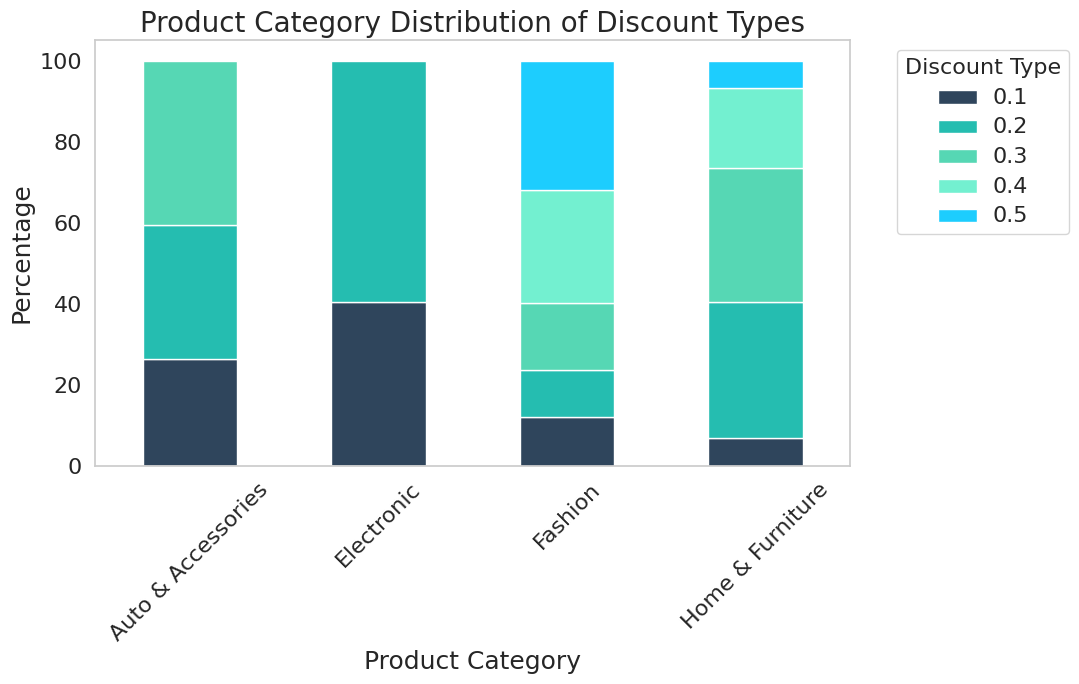

In [ ]:
# Calculate Discount Distribution
df['Discount'] = df['Discount'].astype('category')
discount_distribution = df.groupby(['Product_Category', 'Discount']).size().unstack(fill_value=0)
discount_distribution_percent = discount_distribution.div(discount_distribution.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(11, 7))
discount_distribution_percent.plot(kind='bar', stacked=True, ax=ax, color=['#2F455C', '#25BDB0', '#56D7B4', '#73F0D0', '#1DCDFE'])

plt.xlabel('Product Category', fontsize=18)
plt.ylabel('Percentage', fontsize=18)
plt.title('Product Category Distribution of Discount Types', fontsize=20)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)

legend = plt.legend(title='Discount Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14, title_fontsize=16)
for text in legend.get_texts():
    text.set_fontsize(16)
legend.get_title().set_fontsize(16)
ax.grid(False)
plt.tight_layout()
plt.show()

✍🏼 **Insights**

The 30% discount rate is the most common across all product categories. Fashion and Home & Furniture categories exhibit a wider variety of discount rates, suggesting a more dynamic pricing strategy to appeal to different customer segments. Meanwhile higher discount rates are more prevalent in Home & Furniture.

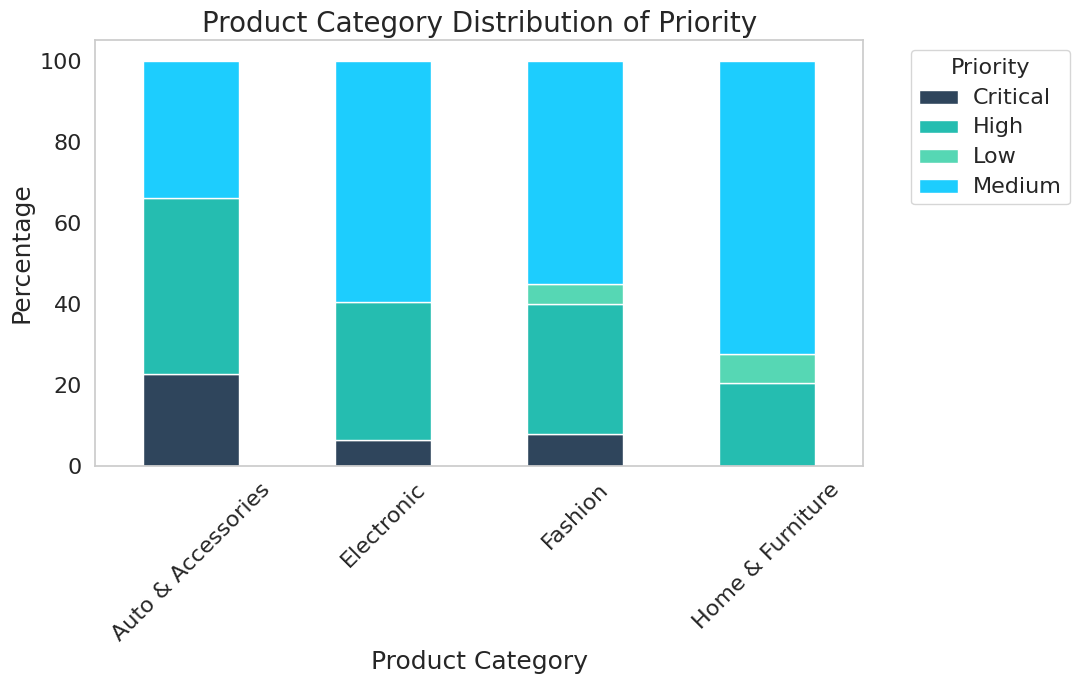

In [ ]:
# Calculate Priority Distribution
df['Order_Priority'] = df['Order_Priority'].astype('category')
discount_distribution = df.groupby(['Product_Category', 'Order_Priority']).size().unstack(fill_value=0)
discount_distribution_percent = discount_distribution.div(discount_distribution.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(11, 7))
discount_distribution_percent.plot(kind='bar', stacked=True, ax=ax, color=['#2F455C', '#25BDB0', '#56D7B4', '#1DCDFE'])
plt.xlabel('Product Category', fontsize=18)
plt.ylabel('Percentage', fontsize=18)
plt.title('Product Category Distribution of Priority', fontsize=20)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)

legend = plt.legend(title='Priority', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14, title_fontsize=16)
for text in legend.get_texts():
    text.set_fontsize(16)
legend.get_title().set_fontsize(16)


ax.grid(False)
plt.tight_layout()
plt.show()

✍🏼 **Insights**

Medium priority is the most common across all categories, indicating that most products are of moderate importance. Higher priority items are significant across categories, especially in Auto & Accessories.

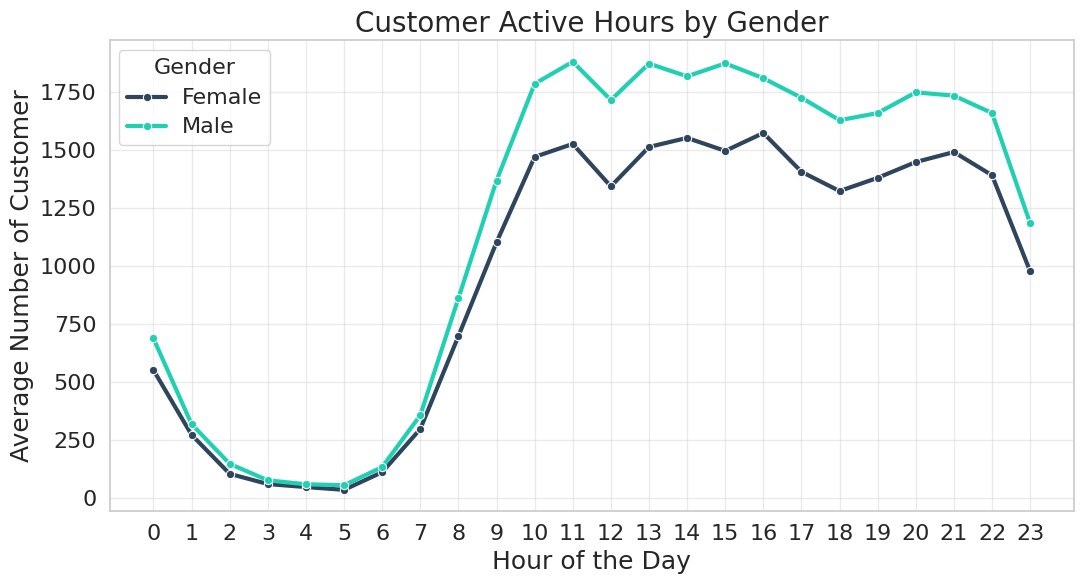

In [ ]:
# Calculate Peak Hours
df['HourOfDay'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
hourly_orders = df.groupby(['HourOfDay', 'Gender'])['Customer_Id'].count().reset_index()
average_hourly_orders = hourly_orders.groupby(['HourOfDay', 'Gender'])['Customer_Id'].mean().reset_index()

plt.figure(figsize=(11, 6))
sns.lineplot(data=average_hourly_orders, x='HourOfDay', y='Customer_Id', hue='Gender',
             palette=['#2F455C', '#21D0B2'], linewidth=3, marker='o')

plt.xlabel('Hour of the Day', fontsize=18)
plt.ylabel('Average Number of Customer', fontsize=18)
plt.title('Customer Active Hours by Gender', fontsize=20)
plt.xticks(range(24), fontsize=16)
plt.yticks(fontsize=16)

legend = plt.legend(title='Gender', fontsize=14, title_fontsize=16)
for text in legend.get_texts():
    text.set_fontsize(16)
legend.get_title().set_fontsize(16)

plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

✍🏼 **Insights**

* Activity starts to increase around 7 AM with peaks around 9 AM. It remains relatively high throughout the day, and got another peak around 6 PM.
* Consider offering early bird discounts around 9 AM. Plan for evening promotions or reminders around 6 PM for the second peak in activity. Offer end-of-day deals or flash sales that begin in the evening to attract more female customers.
* Since male customers maintain high activity throughout the day, ensure that promotions and advertisements are consistently visible. Use push notifications to keep male customers engaged during high activity periods, with special offers or time-limited discounts to leverage the peak activity times.

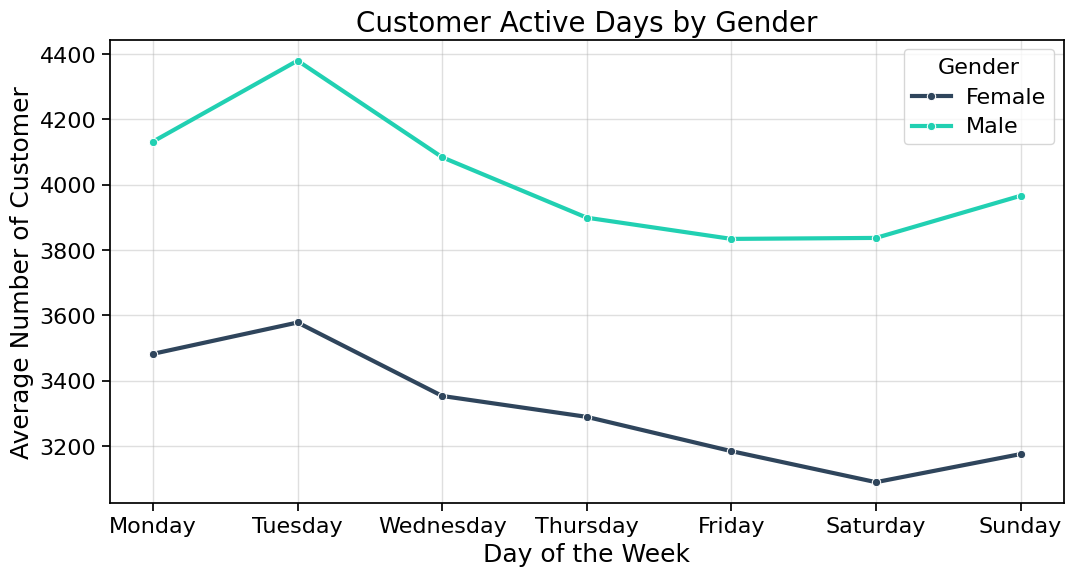

In [ ]:
# Calculate Peak Days
df['DayOfWeek'] = df['Order_Date'].dt.day_name()

daily_orders = df.groupby(['DayOfWeek', 'Gender'])['Customer_Id'].count().reset_index()
average_daily_orders = daily_orders.groupby(['DayOfWeek', 'Gender'])['Customer_Id'].mean().reset_index()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_daily_orders['DayOfWeek'] = pd.Categorical(average_daily_orders['DayOfWeek'], categories=days_order, ordered=True)
average_daily_orders = average_daily_orders.sort_values('DayOfWeek')

plt.figure(figsize=(11, 6))
sns.lineplot(data=average_daily_orders, x='DayOfWeek', y='Customer_Id', hue='Gender',
             palette=['#2F455C', '#21D0B2'], linewidth=3, marker='o')
plt.xlabel('Day of the Week', fontsize=18)
plt.ylabel('Average Number of Customer', fontsize=18)
plt.title('Customer Active Days by Gender', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

legend = plt.legend(title='Gender', fontsize=14, title_fontsize=16)
for text in legend.get_texts():
    text.set_fontsize(16)
legend.get_title().set_fontsize(16)

plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

✍🏼 **Insights**

Male customers are consistently more active throughout the week compared to female customers, where activity peaks on Tuesday and then steadily declines until Sunday, same as well with female customers. Marketing efforts could be targeted more effectively in the earlier of week and weekend.

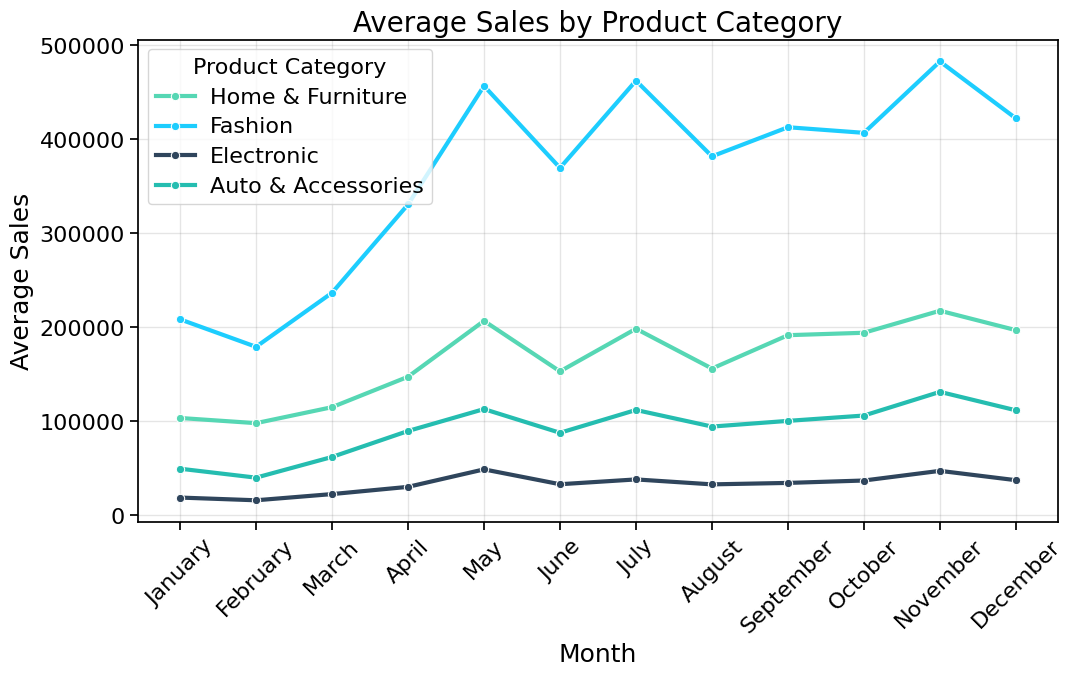

In [ ]:
# Calculate Peak Months
df['Month'] = df['Order_Date'].dt.month_name()

monthly_sales = df.groupby(['Month', 'Product_Category'])['Sales'].sum().reset_index()
average_monthly_sales = monthly_sales.groupby(['Month', 'Product_Category'])['Sales'].mean().reset_index()
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
average_monthly_sales['Month'] = pd.Categorical(average_monthly_sales['Month'], categories=months_order, ordered=True)
average_monthly_sales = average_monthly_sales.sort_values('Month')

plt.figure(figsize=(11, 7))
sns.lineplot(data=average_monthly_sales, x='Month', y='Sales', hue='Product_Category',
             palette=['#56D7B4', '#1DCDFE', '#2F455C', '#25BDB0'], linewidth=3, marker='o')

plt.xlabel('Month', fontsize=18)
plt.ylabel('Average Sales', fontsize=18)
plt.title('Average Sales by Product Category', fontsize=20)
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)

legend = plt.legend(title='Product Category', fontsize=14, title_fontsize=16)
for text in legend.get_texts():
    text.set_fontsize(16)
legend.get_title().set_fontsize(16)

plt.grid(True, color='gray', alpha=0.2)
plt.tight_layout()
plt.show()

✍🏼 **Insights**

Fashion sales peak in May and November, with Home & Furniture and Auto & Accessories show steady growth throughout the year with minor peaks in certain months. Electronics have the lowest sales overall and remain relatively stable throughout the year. Fashion products could benefit from major promotional activities in May and November. Home & Furniture, as well as Auto & Accessories might require consistent advertising to maintain their steady growth, while Electronics might need targeted campaigns to boost sales given their relatively low performance.

✍🏼 **Combined Insights**

* Seasonal Promotions: The fluctuations in the sales trend highlight opportunities for targeted promotions during peak sales months. Understanding the reasons behind these peaks can help replicate success in other months.
* Focusing marketing efforts on Fashion categories can be beneficial, given the high user engagement. Consider optimize Supply Chain and work with suppliers to manage stock levels and ensure timely restocking.
* Customers activity show peak in the morning and another peak in the early evening, suggesting these are prime times for customer engagement and marketing efforts. Marketing efforts could be targeted more effectively in morning, early evening, earlier of week, and weekend.
* ashion dominates both sales and profit and could benefit from major promotional. Sales promotions or campaigns could be strategically placed around May, July, November to maximize returns.